# Script to Generate Sample Data

This Python script will:
- ✅ Generate time-series data for a 24-hour period (or more if needed).
- ✅ Add random variations to mimic real-world fluctuations.
- ✅ Save the data as CSV files in the `data/` folder.

d:\bytes-to-watts-webinar\scripts\demo_project
Sample data generated and saved in 'data' folder.


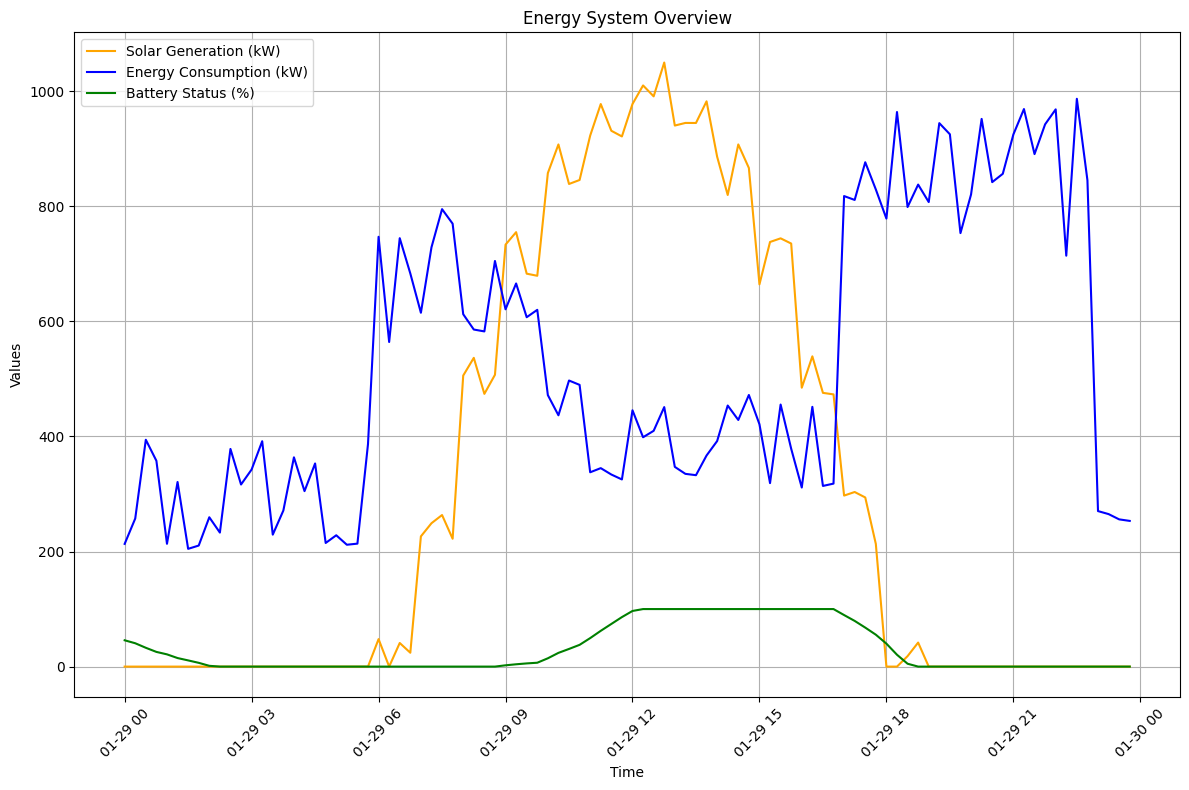

In [4]:
import os
print(os.getcwd())

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Define time range (24 hours, every 15 minutes)
time_index = [datetime(2025, 1, 29, 0, 0) + timedelta(minutes=15*i) for i in range(96)]

# Generate solar generation data (kW) - Peak around noon, zero at night
solar_power = [
    max(0, np.sin((t.hour - 6) * np.pi / 12) * 1000 + np.random.uniform(-50, 50)) if 6 <= t.hour <= 18 else 0
    for t in time_index
]

# Generate energy consumption data (kW) - Higher in morning and evening
energy_consumption = [
    np.random.uniform(500, 800) if 6 <= t.hour <= 9 else
    np.random.uniform(300, 500) if 10 <= t.hour <= 16 else
    np.random.uniform(700, 1000) if 17 <= t.hour <= 22 else
    np.random.uniform(200, 400)
    for t in time_index
]

# Generate battery status (%) - Starts at 50%, charges when excess solar, discharges otherwise
battery_capacity = 5000  # kWh
battery_charge = 50  # Initial state of charge (%)
battery_status = []

for i in range(len(time_index)):
    net_power = solar_power[i] - energy_consumption[i]  # Net power
    battery_charge = min(100, max(0, battery_charge + (net_power / battery_capacity) * 100))
    battery_status.append(battery_charge)

# Save data to CSV
solar_df = pd.DataFrame({'timestamp': time_index, 'solar_generation_kW': solar_power})
energy_df = pd.DataFrame({'timestamp': time_index, 'energy_consumption_kW': energy_consumption})
battery_df = pd.DataFrame({'timestamp': time_index, 'battery_status_%': battery_status})

# Ensure the output directory exists
output_dir = 'data'
os.makedirs(output_dir, exist_ok=True)

# Save data to CSV
solar_df.to_csv(os.path.join(output_dir, 'solar_generation.csv'), index=False)
energy_df.to_csv(os.path.join(output_dir, 'energy_consumption.csv'), index=False)
battery_df.to_csv(os.path.join(output_dir, 'battery_status.csv'), index=False)

print(f"Sample data generated and saved in '{output_dir}' folder.")

# Visualization of the data
plt.figure(figsize=(12, 8))

# Plot solar generation
plt.plot(time_index, solar_power, label='Solar Generation (kW)', color='orange')

# Plot energy consumption
plt.plot(time_index, energy_consumption, label='Energy Consumption (kW)', color='blue')

# Plot battery status
plt.plot(time_index, battery_status, label='Battery Status (%)', color='green')

# Add labels and legend
plt.title('Energy System Overview')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid()

# Format x-axis for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


To implement control logic, we'll simulate real-world decision-making processes for managing energy resources. For this demo, we can:

Set Control Objectives:

Maintain battery status within safe operating levels (e.g., 20%-80%).
Prioritize solar energy usage to minimize grid dependency.
Activate load shedding when the battery is critically low and demand exceeds supply.
Design Control Rules:

Charge the battery when there's surplus solar generation.
Discharge the battery when solar generation is insufficient.
Trigger load shedding if the battery state is critical (below 20%).
Code Implementation:

Develop a script to simulate the control logic based on the generated data.
Update outputs to reflect actions (e.g., battery charging/discharging and load shedding).
Adding Control Logic
Below is a plan for the script:

Load the data from CSV files.
Simulate the control system:
Calculate the net energy balance (solar generation - consumption).
Implement rules for charging/discharging the battery.
Handle load shedding when needed.
Log actions to a new CSV file for visualization.